In [40]:
import pandas as pd
import glob
import os

os.chdir(r"C:\Users\luism\Documents\Programacion_local\Clase\4o Año\Descubrimiento Datos Complejos\DCDC-Proyecto-Stocks")

In [41]:
files = glob.glob('data/processed/FULL_DATASET_PROCESSED_part*.csv')

df = pd.concat([pd.read_csv(f) for f in files], ignore_index = True)

In [42]:
df.loc[4,"AAON"].split("val_adj_close': ")[1].split(",")[0]

'5.26'

In [43]:
# Values in cell are {"val_adj_close": value}, i want to have only the value
values = df.drop(columns = ['Date']).map(lambda x: float(x.split("val_adj_close': ")[1].split(",")[0][:-1]))

nasdaq_sum = values.sum(axis = 1)
nasdaq_sum.index = pd.to_datetime(df['Date'])
nasdaq_sum

Date
2012-01-03 00:00:00+00:00    2.571114e+12
2012-01-04 00:00:00+00:00    2.571086e+12
2012-01-05 00:00:00+00:00    2.782735e+12
2012-01-06 00:00:00+00:00    2.782714e+12
2012-01-09 00:00:00+00:00    2.722217e+12
                                 ...     
2020-01-28 00:00:00+00:00    7.344875e+04
2020-01-29 00:00:00+00:00    7.328687e+04
2020-01-30 00:00:00+00:00    7.274238e+04
2020-01-31 00:00:00+00:00    7.194222e+04
2020-02-03 00:00:00+00:00    7.217017e+04
Length: 2260, dtype: float64

In [44]:
nasdaq_sum.to_frame().rename(columns = {0: 'Value'})

,Value
Date,
2012-01-03 00:00:00+00:00,2.571114e+12
2012-01-04 00:00:00+00:00,2.571086e+12
2012-01-05 00:00:00+00:00,2.782735e+12
2012-01-06 00:00:00+00:00,2.782714e+12
2012-01-09 00:00:00+00:00,2.722217e+12
...,...
2020-01-28 00:00:00+00:00,7.344875e+04
2020-01-29 00:00:00+00:00,7.328687e+04
2020-01-30 00:00:00+00:00,7.274238e+04


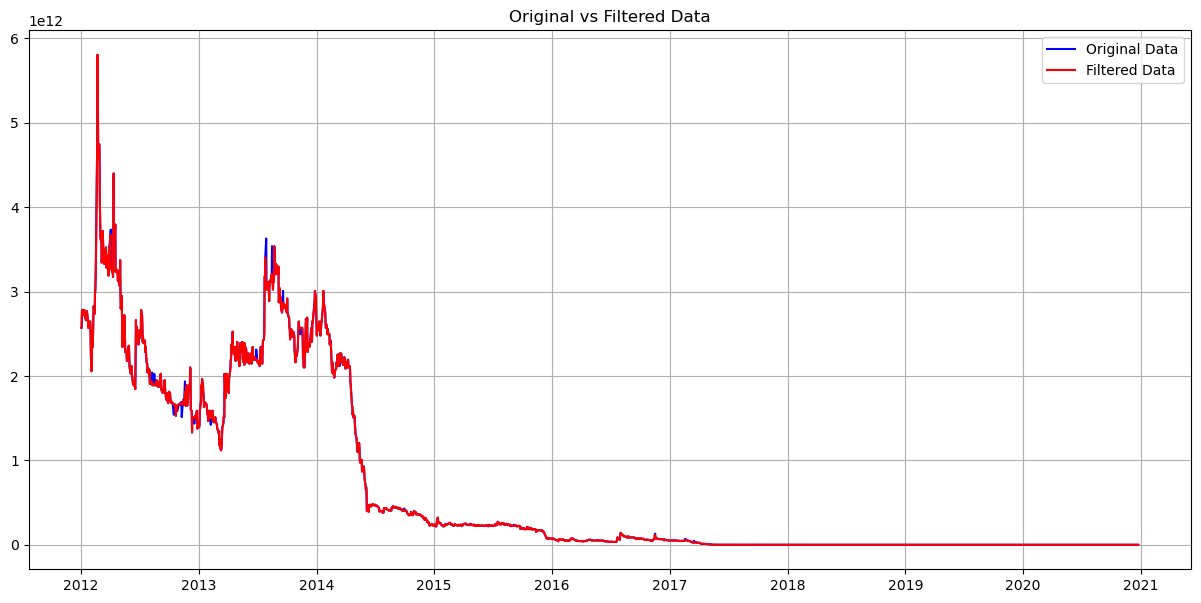

In [45]:
import pyhampel

# Apply the hampel filter to the data
filtered_data = pyhampel.hampel_filter_df(df=nasdaq_sum.to_frame().rename(columns = {0: 'Value'}), vals_col='Value', win_size=10, num_dev=3)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(filtered_data['Value'], label='Original Data', color='blue')
ax.plot(filtered_data['FLTRD_VAL'], label='Filtered Data', color='red')
ax.legend()
plt.title('Original vs Filtered Data')
plt.grid()
plt.show()



In [46]:
filtered_data.query('IS_OUTLIER == True').sort_index()

,Value,FLTRD_VAL,OUTLIER_VAL,IS_OUTLIER
Date,,,,
2012-01-04 00:00:00+00:00,2.571086e+12,2.744883e+12,2.571086e+12,True
2012-04-03 00:00:00+00:00,3.734822e+12,3.281231e+12,3.734822e+12,True
2012-08-09 00:00:00+00:00,2.041267e+12,1.905200e+12,2.041267e+12,True
2012-08-16 00:00:00+00:00,2.026146e+12,1.897627e+12,2.026146e+12,True
2012-08-20 00:00:00+00:00,1.950544e+12,1.897627e+12,1.950544e+12,True
2012-10-15 00:00:00+00:00,1.542275e+12,1.670796e+12,1.542275e+12,True
2012-10-16 00:00:00+00:00,1.542273e+12,1.663234e+12,1.542273e+12,True
2012-10-26 00:00:00+00:00,1.587638e+12,1.655677e+12,1.587638e+12,True
2012-11-08 00:00:00+00:00,1.693478e+12,1.663235e+12,1.693478e+12,True
